In [95]:
import pandas as pd
dataset = pd.read_csv("/home/andre/Desktop/projeto Renner/dataset_b.csv")
# https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [96]:
import tensorflow as tf

In [97]:
#!pip install tensorflow

In [98]:
dataset['IBC-Br'] = [float(str(i).replace(",", ".")) for i in dataset['IBC-Br']]

In [99]:
dataset['IBC-Br']

0      132.66
1      136.18
2      144.93
3      139.89
4      143.23
        ...  
127    142.05
128    138.96
129    138.46
130    140.22
131    141.96
Name: IBC-Br, Length: 132, dtype: float64

In [100]:
dataset.shape

(132, 5)

In [101]:
#dataset.drop(0) # tira a linha 0 
new_data_set = dataset.drop(columns=['date'])

In [102]:
new_data_set.head()

,trend,ipca,selic,IBC-Br
0,Uptrend,0.83,10.943548,132.66
1,Uptrend,0.80,11.250000,136.18
2,Uptrend,0.79,11.717742,144.93
3,Uptrend,0.77,11.800000,139.89
4,Uptrend,0.47,12.000000,143.23


In [103]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()  

In [104]:
y = labelencoder.fit_transform(new_data_set['trend'])

In [105]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
previsores = new_data_set.drop(['trend'], axis = 1)
X = previsores.iloc[:,0:132].values

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.shape, y_train

((99, 3),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]))

In [108]:
X_test.shape, y_test

((33, 3),
 array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [109]:
# input_shape é igual ao número de atributos
# o erro que dava é porque estava tentando usar a activation = 'softmax', quando coloquei a sigmoid deu certo.

In [110]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 3, activation='relu', input_shape=(3,)))
rede_neural.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 3, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [111]:
rede_neural.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 3)                 12        
                                                                 
 dense_39 (Dense)            (None, 3)                 12        
                                                                 
 dense_40 (Dense)            (None, 3)                 12        
                                                                 
 dense_41 (Dense)            (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [112]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [113]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.6667
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.8485
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.8485
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.8485
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.8485
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.8485
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.8485
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.8485
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.8485
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.8485
Epoch 11/200
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.5999 - accuracy: 0.8485
Epoch 85/200
4/4 [==============================] - 0s 6ms/step - loss: 0.5990 - accuracy: 0.8485
Epoch 86/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.8485
Epoch 87/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.8485
Epoch 88/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5962 - accuracy: 0.8485
Epoch 89/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5953 - accuracy: 0.8485
Epoch 90/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.8485
Epoch 91/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5935 - accuracy: 0.8485
Epoch 92/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.8485
Epoch 93/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.8485
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.8485
Epoch 168/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.8485
Epoch 169/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.8485
Epoch 170/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5341 - accuracy: 0.8485
Epoch 171/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.8485
Epoch 172/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.8485
Epoch 173/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5325 - accuracy: 0.8485
Epoch 174/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.8485
Epoch 175/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.8485
Epoch 176/200
4/4 [==============================] - 0s 5ms/step - loss: 0.5308 - accuracy: 0.8485
Epoch 177/200
4/4 [=====

In [114]:
X_train

array([[ 7.80000000e-01,  1.17016129e+01,  1.45480000e+02],
       [ 5.90000000e-01,  7.33064516e+00,  1.47710000e+02],
       [ 1.30000000e-01,  6.50000000e+00,  1.39400000e+02],
       [ 1.00000000e-02,  1.10000000e+01,  1.49850000e+02],
       [ 4.80000000e-01,  6.50000000e+00,  1.35770000e+02],
       [ 7.90000000e-01,  1.37000000e+01,  1.38530000e+02],
       [ 1.50000000e-01,  1.21833333e+01,  1.41750000e+02],
       [ 5.30000000e-01,  3.85000000e+00,  1.37780000e+02],
       [ 4.30000000e-01,  8.17741935e+00,  1.47460000e+02],
       [ 3.60000000e-01,  8.98387097e+00,  1.44560000e+02],
       [ 4.60000000e-01,  1.10000000e+01,  1.47140000e+02],
       [ 3.80000000e-01,  1.32661290e+01,  1.28470000e+02],
       [ 5.30000000e-01,  1.20000000e+01,  1.42300000e+02],
       [ 6.40000000e-01,  2.00000000e+00,  1.37120000e+02],
       [ 2.20000000e-01,  6.50000000e+00,  1.39080000e+02],
       [ 2.40000000e-01,  2.04032258e+00,  1.35650000e+02],
       [ 7.30000000e-01,  8.86290323e+00

In [115]:
y_pred = rede_neural.predict(X_test)
y_pred

2/2 [==============================] - 0s 4ms/step


array([[0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416],
       [0.6577416]], dtype=float32)

In [116]:
y_pred = (y_pred >= 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  8],
       [ 0, 25]])

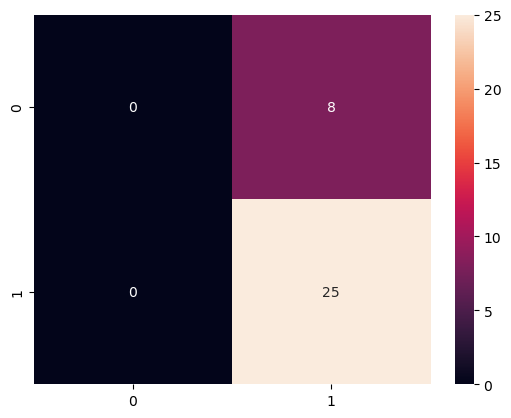

In [118]:
import seaborn as sns
sns.heatmap(cm, annot=True);

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.76      1.00      0.86        25

    accuracy                           0.76        33
   macro avg       0.38      0.50      0.43        33
weighted avg       0.57      0.76      0.65        33



/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
# considerando tendẽncia de alta mesmo com correções, mas levando em consideração os fundos e topos ascendentes